# Mahcine Learning HW #2 Question 1

## Zehui Wang ##



## Question 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).


In [31]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head(10)

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

Text(0, 0.5, 'count')

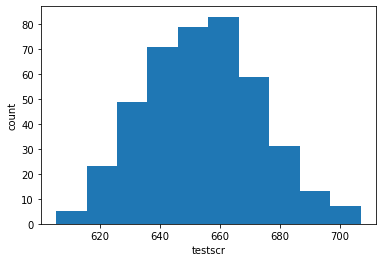

In [2]:
plt.hist(df['testscr'])
plt.xlabel('testscr')
plt.ylabel('count')

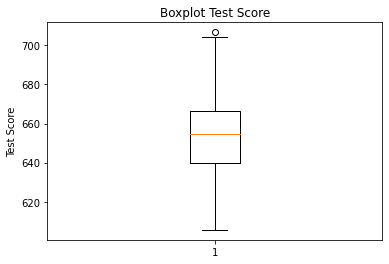

In [3]:
# boxplot
plt.boxplot(df["testscr"])
plt.ylabel('Test Score')
plt.title('Boxplot Test Score')
plt.show()

Text(0, 0.5, 'count')

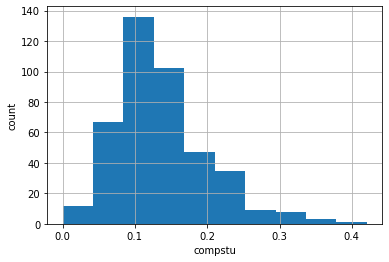

In [4]:
df['compstu'].hist()
plt.xlabel('compstu')
plt.ylabel('count')

Text(0, 0.5, 'count')

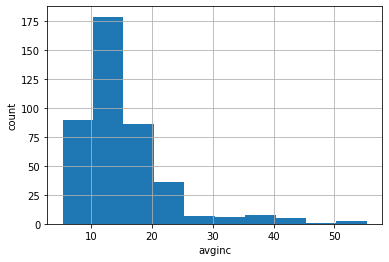

In [5]:
df['avginc'].hist()
plt.xlabel('avginc')
plt.ylabel('count')

Text(0, 0.5, 'count')

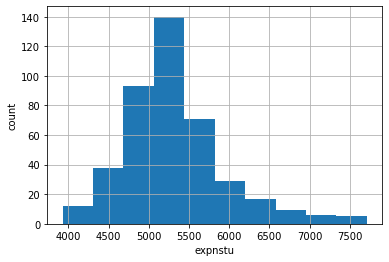

In [6]:
df['expnstu'].hist()
plt.xlabel('expnstu')
plt.ylabel('count')

## 1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'testscr')

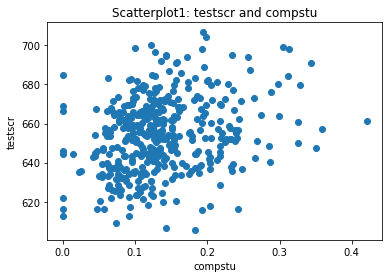

In [7]:
plt.scatter(df['compstu'],df['testscr'])
plt.title("Scatterplot1: testscr and compstu")
plt.xlabel('compstu')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

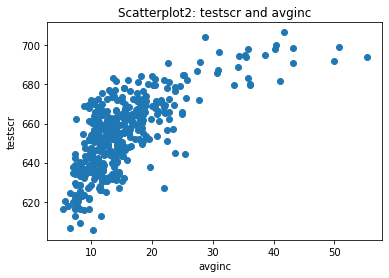

In [8]:
plt.scatter(df['avginc'],df['testscr'])
plt.title("Scatterplot2: testscr and avginc")
plt.xlabel('avginc')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

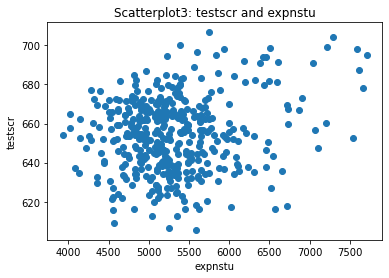

In [9]:
plt.scatter(df['expnstu'],df['testscr'])
plt.title("Scatterplot3: testscr and expnstu")
plt.xlabel('expnstu')
plt.ylabel('testscr')

## 1.3 Split data in training and test set. 

## Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. 

## Does scaling the data with the StandardScaler help?

First, I will split the data into X and y

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

df = df.iloc[:, 5:16] #delete the last two columns

y = df['testscr']
X = df.loc[:, df.columns != 'testscr'] #Choose all the raws and all the columns except "InMichielIn"

print(y[0:5])
X.head()


0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)

X_train.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
315,160,10.880000,13.375800,53.503201,38,0.237500,6870.346191,14.705882,11.826000,2.500000
13,487,24.340000,24.609400,77.148399,0,0.000000,4818.612793,20.008217,8.279000,20.533880
354,198,9.000000,2.451000,12.745100,24,0.121212,4593.196777,22.000000,12.640000,0.000000
61,5138,290.774994,58.752201,84.999001,560,0.108992,5606.781738,17.670021,10.905643,32.989491
171,3981,210.000000,41.773399,51.770901,606,0.152223,5358.517090,18.957144,12.749143,8.842000


Then, I will scale my data using standard scaler for future use

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # set up the function

# scale the train_set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale the test_set
X_test_scaled = scaler.transform(X_test)

## Train KNN Regression using cross-validation with the default parameters

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

# Create a KNN Regessor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
print("Cross Validation score for X without sclaer: {:.6f}".format(np.mean(cross_val_score(
    KNeighborsRegressor(), X_train, y_train, cv=5))))
print("Test score without sclaer: {:.6f}".format(knn.score(X_test, y_test)))


Cross Validation score for X without sclaer: -0.024944
Test score without sclaer: 0.077402


## Train with KNN using Cross-Validation with standard scaler

In [42]:
# Create a KNN Regessor
knn = KNeighborsRegressor()

knn.fit(X_train_scaled, y_train)

print("Cross Validation score for X with sclaer: {:.6f}".format(np.mean(cross_val_score(
    KNeighborsRegressor(), X_train_scaled, y_train, cv=5))))
print("Test score with sclaer: {:.6f}".format(knn.score(X_test_scaled, y_test)))

Cross Validation score for X with sclaer: -0.253873
Test score with sclaer: -0.235612


Yes: I can see that using StandardScaler really helps the KNN score a lot.

## Train with Linear Regression (OLS) using Cross-Validation with default parameters

In [52]:
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression().fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-1.21788340e-03  2.36182090e-02 -6.84748453e-02 -4.12750709e-01
  2.65072603e-04  1.42812681e+01  2.13496335e-03 -1.06260889e-01
  5.40880275e-01 -1.67101200e-01]
lr.intercept_: 656.4016910335039


In [53]:

print("Cross Validation score for X without sclaer: {:.2f}".format(np.mean(cross_val_score(
    LinearRegression(), X_train, y_train, cv=5))))
print("Test score without sclaer: {:.2f}".format(lr.score(X_test, y_test)))


Cross Validation score for X without sclaer: 0.79
Test score without sclaer: 0.80


In [55]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

scaler = preprocessing.StandardScaler() # set up the function

# scale the train_set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale the test_set
X_test_scaled = scaler.transform(X_test)

print("Cross Validation score for X with sclaer: {:.2f}".format(np.mean(cross_val_score(
    LinearRegression(), X_train_scaled, y_train, cv=5))))
print("Test score with sclaer: {:.2f}".format(lr.score(X_test_scaled, y_test)))

Cross Validation score for X with sclaer: 0.79
Test score with sclaer: 0.80


No, it is obvious that standard scaler does not help with Linear regression at all becuase it is linear.

## Train with Ridge using cross-validation with default parameters.

Instead of arbitrarily choosing alpha , it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV(). By default, the function performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the argument cv.

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

print("Cross Validation score for X without sclaer: {:.2f}".format(np.mean(cross_val_score(
    Ridge(), X_train, y_train, cv=5))))
print("Test score without sclaer: {:.2f}".format(ridge.score(X_test, y_test)))

print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Cross Validation score for X without sclaer: 0.74
Test score without sclaer: 0.89
Number of features used: 10
Number of features used: 10


## Train with Ridge using cross-validation using scaler with default parameters.

In [19]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

print("Cross Validation score for X with sclaer: {:.2f}".format(np.mean(cross_val_score(
    Ridge(), X_train_scaled, y_train, cv=5))))
print("Test score with sclaer: {:.2f}".format(ridge.score(X_test_scaled, y_test)))


Cross Validation score for X with sclaer: -0.11
Test score with sclaer: 0.01


## Train with lasso using cross-validation with default parameters.

In [20]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print("Cross Validation score for X without sclaer: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test score without sclaer: {:.2f}".format(lassocv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))

#print("lasso.coef_: {}".format(lassocv.coef_))

Cross Validation score for X without sclaer: 0.78
Test score without sclaer: 0.89
Number of features used: 7
Number of features used: 7


## Train with lasso using cross-validation using scaler default parameters.

In [21]:
from sklearn.linear_model import LassoCV


X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
lasso_ss = LassoCV().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
lasso_ss.score(X_test_scaled, y_test)


print("Cross Validation score for X with sclaer: {:.2f}".format(lasso_ss.score(X_test_scaled, y_test)))
print("Test score without sclaer: {:.2f}".format(lasso_ss.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso_ss.coef_ != 0)))
print("Number of features used: {}".format(np.sum(lasso_ss.coef_ != 0)))

# print("lasso.coef_: {}".format(lasso_ss.coef_))

Cross Validation score for X with sclaer: 0.77
Test score without sclaer: 0.77
Number of features used: 7
Number of features used: 7


## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

##GridSearchCV with KNN

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#refer to step name with two underscores before argument name when...
#you build a parameter grid

param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print('The score for GrideSeachCV with KNN is: ',grid.score(X_test_scaled, y_test))

{'kneighborsregressor__n_neighbors': 5}
The score for GrideSeachCV with KNN is:  0.7389802586502423


Compared to 0.7744 in KNN score with sclaer, GridSearch does not improve the result

## GridSearchCV with Ridge

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

parameters = {"alpha": np.logspace(-3,2,10)}

grid_ridge = GridSearchCV(Ridge(),parameters, cv=5)
grid_ridge.fit(X_train_scaled, y_train) # np.logspace(-3,1,2,50)

print("best mean cross-validation score: {:.3f}".format(grid_ridge.best_score_))
print("best parameters: {}".format(grid_ridge.best_params_))
print("test-set score: {:.3f}".format(grid_ridge.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.793
best parameters: {'alpha': 2.1544346900318843}
test-set score: 0.770


Compared to the score by Ridge in 1.3 with sclaer: 0.80, GridSearch does not improve the score

## GridSearchCV with Lasso

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#refer to step name with two underscores before argument name when...
#you build a parameter grid
parameters = {"alpha": np.logspace(-8,0,10)}

grid_lasso = GridSearchCV(Lasso(),parameters, cv=5, scoring="r2",verbose=1,n_jobs=-1)
grid_lasso.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_lasso.best_score_))
print("best parameters: {}".format(grid_lasso.best_params_))
print("test-set score: {:.3f}".format(grid_lasso.score(X_test_scaled, y_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


best mean cross-validation score: 0.796
best parameters: {'alpha': 0.12915496650148828}
test-set score: 0.771


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


Compared to the score by Lasso in 1.3 with sclaer: 0.78, GridSearch does not improve the score

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [25]:
best_ridge = Ridge(alpha=7.742).fit(X_train_scaled, y_train)
coef_ridge = best_ridge.coef_
print("coef_ridge: ",coef_ridge)

best_lasso = Lasso(alpha=0.129154).fit(X_train_scaled, y_train)
coef_lasso = best_lasso.coef_
print("coef_lasso: ",coef_lasso)


coef_ridge:  [ -0.31371041   0.36629142  -0.26332024 -10.69014884  -0.24465974
   0.78148751   0.42776611  -0.58708236   4.82833041  -2.80547151]
coef_lasso:  [ -0.          -0.           0.         -11.44585568  -0.13706847
   0.72534602   0.37033376  -0.55513226   4.57914779  -2.4560406 ]


From the coefficient above, we can see that the Ridge thinks the most important one is the 9th; and the Lasso also think the most important one is the 9th.

## Therefore, they Ridge and Lasso agree that avginc is the most important feature

We can see that both Ridge and Lasso value the 7th coefficient, which is expnstu; while Ridge values the 6th (compstu), Lasso does not.

## 1.6 Discuss which final model you would choose to predict new data


For me, I would choose Lasso. 


The reason for me to chooseI Lasso is that it clearly shows which features are important and which are not (as showed in 1.,5). Also it has comparetively high testing scores over other three models.
